<a href="https://www.kaggle.com/code/tristanjorge97/titanic-survivor-classification?scriptVersionId=141907149" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# import libraries
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# set seed
np.random.seed(38)

In [3]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<Axes: xlabel='Pclass', ylabel='count'>

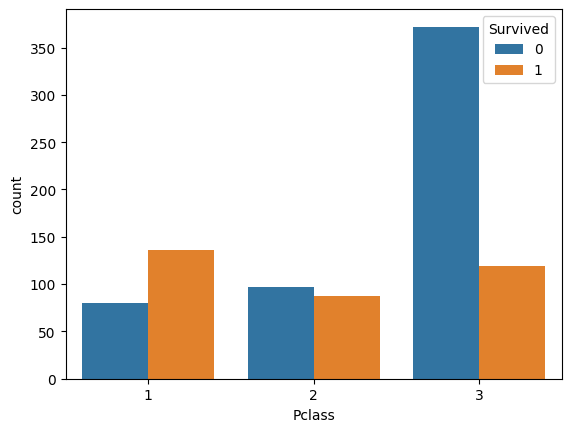

In [7]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)

<Axes: xlabel='Sex', ylabel='count'>

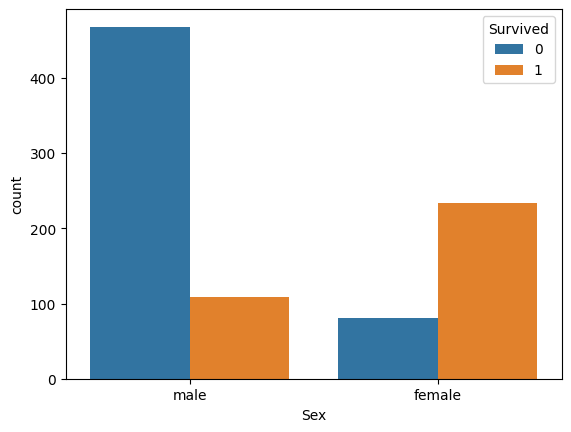

In [8]:
sns.countplot(x='Sex', hue='Survived', data=train_df)

<Axes: xlabel='Age', ylabel='Count'>

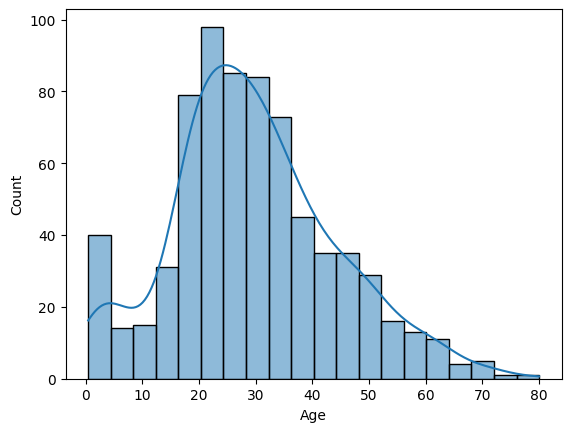

In [9]:
sns.histplot(train_df['Age'], kde=True)

<Axes: xlabel='SibSp', ylabel='count'>

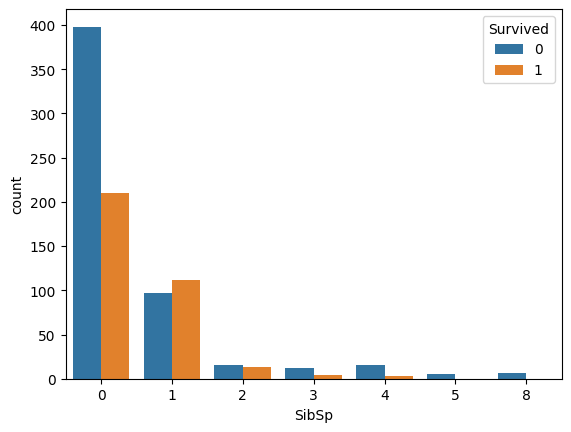

In [10]:
sns.countplot(x='SibSp', hue='Survived', data=train_df)

<Axes: xlabel='Embarked', ylabel='count'>

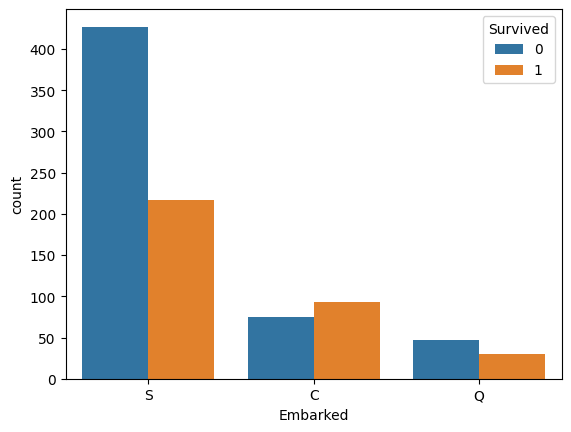

In [11]:
sns.countplot(x='Embarked', hue='Survived', data=train_df)

In [12]:
# Approach 1 - Omit columns with missing values (drop columns with NaN - 'Age','Cabin', 'Embarked')
# train_df = train_df.dropna(axis=1)
# train_df.head()

# Approach 2 - Replace missing values with median value, drop NaN rows, drop irrelevant columns, convert columns to numerical
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Sex'] = train_df['Sex'].map({'female':0, 'male': 1})
train_df.dropna(subset=['Embarked'], inplace=True)
train_df['Embarked'] = train_df['Embarked'].map({'S':0, 'C':1, 'Q':2})
train_df = train_df.drop(['Name', 'Fare','Cabin', 'Ticket'], axis=1)

test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Sex'] = test_df['Sex'].map({'female':0, 'male': 1})
test_df['Embarked'] = test_df['Embarked'].map({'S':0, 'C':1, 'Q':2})
test_df = test_df.drop(['Name', 'Fare','Cabin', 'Ticket'], axis=1)

In [13]:
features = ['Pclass','Sex','Age','SibSp','Parch','Embarked']

X = train_df[features]
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

X_test = test_df[features]

In [14]:
# Building the Random Forest Classifier Model
rf_t1 = time.perf_counter()
rf = RandomForestClassifier(random_state=0)

# Hyperparameters for GridSearchCV
rf_param_grid = {
    'n_estimators': np.arange(10,20),
    'max_depth': [3,5,7],
    'max_features': [1,3,5],
    'min_samples_leaf': [1,2,4]
}

# GridSearchCV for Random Forest Model
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy').fit(X_train, y_train)

# Best hyperparameters and model for Random Forest
best_rf_params = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_


# Evaluating the best Random Forest model
rf_accuracy = best_rf_model.score(X_val, y_val)
rf_t2 = time.perf_counter()
print(f"Time Elasped for Random Forest Model: {round(rf_t2-rf_t1,2)}s.")
print(f"Best Random Forest Model params: {best_rf_params}")
print(f"Random Forest Model accuracy: {round(rf_accuracy,4)}.")

# Time Elasped for Random Forest Model: 527.14s.
# Best Random Forest Model params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
# Random Forest Model accuracy: 0.7892.

Time Elasped for Random Forest Model: 58.39s.
Best Random Forest Model params: {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 4, 'n_estimators': 10}
Random Forest Model accuracy: 0.7713.


In [15]:
# Building the Gradient Boosting Classifier Model
gb_t1 = time.perf_counter()
gb = GradientBoostingClassifier(random_state=0)

# Hyperparameters for GridSearchCV
gb_param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000]
}

# GridSearchCV for Gradient Boosting Model
gb_grid_search = GridSearchCV(gb, gb_param_grid, cv=5, scoring='accuracy').fit(X_train, y_train)

# Best hyperparameters and model for Gradient Boosting
best_gb_params = gb_grid_search.best_params_
best_gb_model = gb_grid_search.best_estimator_

# Evaluating the best Gradient Boosting model
gb_accuracy = best_gb_model.score(X_val, y_val)
gb_t2 = time.perf_counter()
print(f"Time Elasped for Gradient Boosting Model: {round(gb_t2-gb_t1,2)}s.")
print(f"Best Gradient Boosting Model params: {best_gb_params}")
print(f"Gradient Boosting Model accuracy: {round(gb_accuracy,4)}.")

# Time Elasped for Gradient Boosting Model: 175.47s.
# Best Gradient Boosting Model params: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000}
# Gradient Boosting Model accuracy: 0.7713.

Time Elasped for Gradient Boosting Model: 168.88s.
Best Gradient Boosting Model params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting Model accuracy: 0.7713.


In [16]:
# Building the Neural Network Model
ann_t1 = time.perf_counter()
ann = Sequential()
ann.add(Dense(units=16, activation='relu'))
ann.add(Dense(units=8, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

# EarlyStopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Compile ANN
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# Convert training, validation data from DataFrames to NumPy to Tensor - Approach 1
# X_train_np = X_train.values.astype(np.int32)
# y_train_np = y_train.values.astype(np.int32)
# X_val_np = X_val.values.astype(np.int32)
# y_val_np = y_val.values.astype(np.int32)

# X_train_tf = tf.constant(X_train_np, dtype=tf.float32)
# y_train_tf = tf.constant(y_train_np, dtype=tf.float32)
# X_val_tf = tf.constant(X_val_np, dtype=tf.float32)
# y_val_tf = tf.constant(y_val_np, dtype=tf.float32)

# Fit the model to training data
ann.fit(X_train, y_train, batch_size=64, epochs = 100, callbacks=[early_stopping])

y_pred = (ann.predict(X_val)>0.5).astype(int)

ann_accuracy = accuracy_score(y_val, y_pred)
ann_t2 = time.perf_counter()
print(f"Time Elasped for Neural Network Model: {round(ann_t2-ann_t1,2)}s.")
print(f"Artificial Neural Network Model accuracy: {round(ann_accuracy,4)}")

# Time Elasped for Neural Network Model: 6.59s.
# Artificial Neural Network Model accuracy: 0.7713

Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 1.5644 - accuracy: 0.6276
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 1.1428 - accuracy: 0.6366
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8016 - accuracy: 0.6336
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.6156
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.6111
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.6396
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.6351
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.6381
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6426
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.6502
Epoch 11/

In [17]:
# Scale Data for KNN, LR, SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [18]:
# Building a K-Nearest Neighbors Model
knn_t1 = time.perf_counter()
knn = KNeighborsClassifier()

# Hyperparameters for GridSearchCV
knn_param_grid = {
    'n_neighbors': np.arange(1,31)
}

# GridSearchCV for K-Nearest Neighbors Model
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy').fit(X_train_scaled, y_train)

# Best hyperparameters and model for K-Nearest Neighbors Model
best_knn_params = knn_grid_search.best_params_
best_knn_model = knn_grid_search.best_estimator_

# Evaluating the best K-Nearest Neighbors Model
knn_accuracy = best_knn_model.score(X_val_scaled, y_val)
knn_t2 = time.perf_counter()
print(f"Time Elasped for K-Nearest Neighbors Model: {round(knn_t2-knn_t1,2)}s.")
print(f"Best K-Nearest Neighbors Model params: {best_knn_params}")
print(f"K-Nearest Neighbors Model accuracy: {round(knn_accuracy,4)}.")

# Time Elasped for K-Nearest Neighbors Model: 2.27s.
# Best K-Nearest Neighbors Model params: {'n_neighbors': 12}
# K-Nearest Neighbors Model accuracy: 0.7848.

Time Elasped for K-Nearest Neighbors Model: 2.14s.
Best K-Nearest Neighbors Model params: {'n_neighbors': 12}
K-Nearest Neighbors Model accuracy: 0.7848.


In [19]:
# Building a Logistic Regression Model
lr_t1 = time.perf_counter()
lr = LogisticRegression()

# Hyperparameters for GridSearchCV
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10]
}

# GridSearchCV for Logistic Regression Model
lr_grid_search = GridSearchCV(lr, lr_param_grid, cv=5, scoring='accuracy').fit(X_train_scaled, y_train)

# Best hyperparameters and model for Logistic Regression Model
best_lr_params = lr_grid_search.best_params_
best_lr_model = lr_grid_search.best_estimator_

# Evaluating the best Logistic Regression Model
lr_accuracy = best_lr_model.score(X_val_scaled, y_val)
lr_t2 = time.perf_counter()
print(f"Time Elasped for Logistic Regression Model: {round(lr_t2-lr_t1,2)}s.")
print(f"Best Logistic Regression Model params: {best_lr_params}")
print(f"Logistic Regression Model accuracy: {round(lr_accuracy,4)}.")

# Time Elasped for Logistic Regression Model: 0.12s.
# Best Logistic Regression Model params: {'C': 0.01}
# Logistic Regression Model accuracy: 0.7713.

Time Elasped for Logistic Regression Model: 0.11s.
Best Logistic Regression Model params: {'C': 0.01}
Logistic Regression Model accuracy: 0.7713.


In [20]:
# Building a Support Vector Machine Model
svm_t1 = time.perf_counter()
svm = SVC(random_state=0)

# Hyperparameters for GridSearchCV
svm_param_grid = {
    'C': np.logspace(-4,1,6),
    'gamma': np.logspace(-4,1,6)
}

# GridSearchCV for Support Vector Machine Model
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5, scoring='accuracy').fit(X_train_scaled, y_train)

# Best hyperparameters and model for Support Vector Machine Model
best_svm_params = svm_grid_search.best_params_
best_svm_model = svm_grid_search.best_estimator_

# Evaluating the best Support Vector Machine Model
svm_accuracy = best_svm_model.score(X_val_scaled, y_val)
svm_t2 = time.perf_counter()
print(f"Time Elasped for Support Vector Machine Model: {round(svm_t2-svm_t1,2)}s.")
print(f"Best Support Vector Machine Model params: {best_svm_params}")
print(f"Support Vector Machine Model accuracy: {round(svm_accuracy,4)}.")

Time Elasped for Support Vector Machine Model: 2.72s.
Best Support Vector Machine Model params: {'C': 10.0, 'gamma': 0.1}
Support Vector Machine Model accuracy: 0.7848.


In [21]:
# Choosing the best model
models = {
    'Random Forest': rf_accuracy, 
    'Gradient Boosting': gb_accuracy, 
    'Artificial Neural Network': ann_accuracy,
    'K-Nearest Neighbors': knn_accuracy,
    'Logistic Regression': lr_accuracy,
    'Support Vector Machine': svm_accuracy
}
max_key = max(models, key=lambda k: models[k])
max_value = models[max_key]
models
for k, v in models.items():
    print(k,round(v,4))
print(f"The best model is {max_key} with an accuracy of {round(max_value,4)}.")

Random Forest 0.7713
Gradient Boosting 0.7713
Artificial Neural Network 0.7892
K-Nearest Neighbors 0.7848
Logistic Regression 0.7713
Support Vector Machine 0.7848
The best model is Artificial Neural Network with an accuracy of 0.7892.


In [22]:
# Running the best model - Approach 1
# X_test_np = X_test.values.astype(np.int32)
# X_test_tf = tf.constant(X_test_np, dtype=tf.float32)
# predictions = (ann.predict(X_test_tf).flatten()>0.5).astype(int)

# Running the best model
predictions = best_rf_model.predict(X_test)

output = pd.DataFrame({'PassengerID': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
